In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
f1 = lambda x: 2*x-2
f2 = lambda x: (1-x)/2
f3 = lambda x: 4-x

In [3]:
x = np.linspace(0,5, 1000)

y1 = f1(x)
y2 = f2(x)
y3 = f3(x)


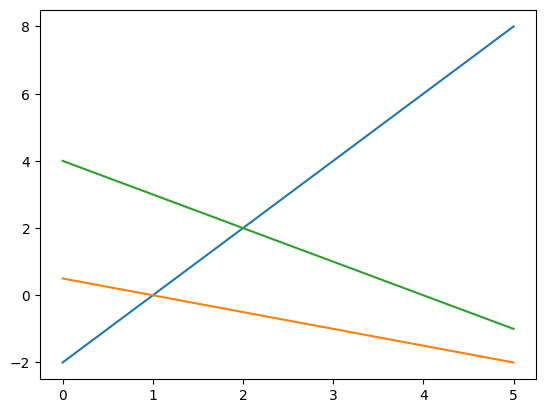

In [4]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

Al realizar la grafica es evidente que las 3 rectas dadas no se cruzan simultaneamente en algun punto en particular. Esto quiere decir que el sistema no tiene solucion exacta y, por lo tanto, al resolverlo usando metodos numericos se obtiene el punto en el cual las 3 rectas estan lo mas cerca de cruzarse. Cualitativamente, este punto esta cerca de [1.5,0.5]. A continuacion se realiza el calculo para hallar dicho punto numericamente. 

In [5]:
M = np.array([[2,-1],[1,2],[1,1]])
b = np.array(([2], [1], [4]))

pto = np.matmul(np.linalg.inv(np.matmul(M.T, M)), np.matmul(M.T, b))
pto

array([[1.42857143],
       [0.42857143]])

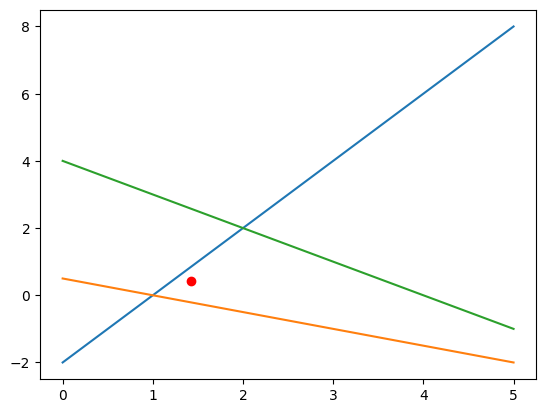

In [6]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.scatter(pto[0],pto[1], color='red')

In [18]:
X = np.linspace(-5, 5, 1001) 
Y = np.linspace(-5, 5, 1001)

def Dist(M,b,x,y):
    V = np.array(([x], [y]))
    dist = np.linalg.norm(np.matmul(M, V) - b )               
    return dist

def MinDist(M,b):
    
    minDist = np.inf
    minpos = np.zeros(2)
    Z = np.zeros((len(X), len(Y)))
    
    for i in range(len(X)):
            for j in range(len(Y)):
                dist = Dist(M, b, X[i], Y[j])
                Z[i][j] = dist
                if dist < minDist:
                    minDist = dist
                    minpos[0] = X[i]
                    minpos[1] = Y[j]
    return minpos,Z,minDist

In [19]:
minpos,Z,minDist = MinDist(M,b)
minpos

array([1.43, 0.43])

In [21]:
minDist

2.5354683985409876

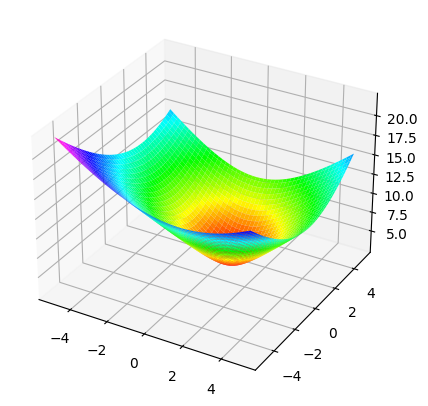

In [22]:
X1,Y1 = np.meshgrid(X,Y)
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1,Y1,Z,cmap='gist_rainbow')